# Brownian Motion for Financial Mathematics

In [1]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 

## Symmetric Random Walk

In [2]:
M = 10 # number of simulations
t = 10 # time

In [3]:
random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

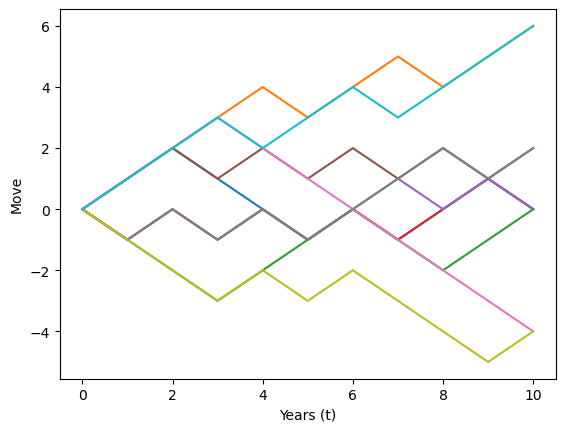

In [4]:
plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

### Properties of a Symmetric Random Walk

In [5]:
# Quadratic variation and variance functions: 
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(), 3)
variance = lambda x: round(np.var(x, axis=0), 3)

In [7]:
[quadratic_variation(path) for path in rw_paths.T[:10]]

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

In [13]:
[variance(path) for path in rw_paths[1:11]]

[1.0, 2.44, 4.96, 3.24, 3.4, 3.36, 4.84, 6.24, 8.64, 10.56]

## Approximating Brownian Motion with Random Symmetric Walks

In [10]:
M = 10 # number of simulations
t = 10 # time 
n = 10

In [11]:
random_walk = [1, -1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M,t*n)).T
origin = np.zeros((1, M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

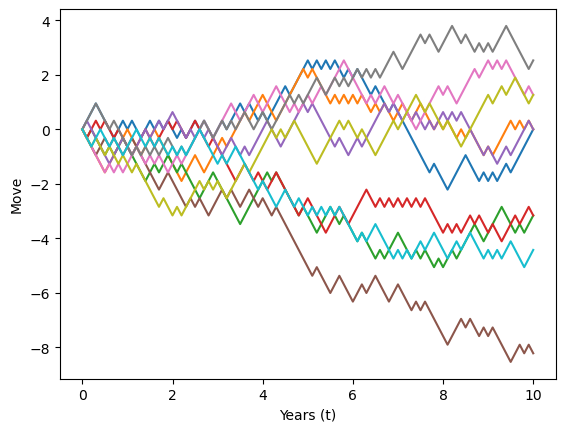

In [12]:
time = np.linspace(0, t, t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T

plt.plot(tt, srw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [14]:
[variance(path) for path in srw_paths[1:11]]

[0.084, 0.244, 0.464, 0.416, 0.496, 0.24, 0.26, 0.196, 0.256, 0.16]

In [15]:
[quadratic_variation(path) for path in srw_paths.T[:10]]

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]

## Limit of a Binomial Distribution
$\lim_{n \to \infty} W^{(n)}(t) \approx N(0, t)$ 

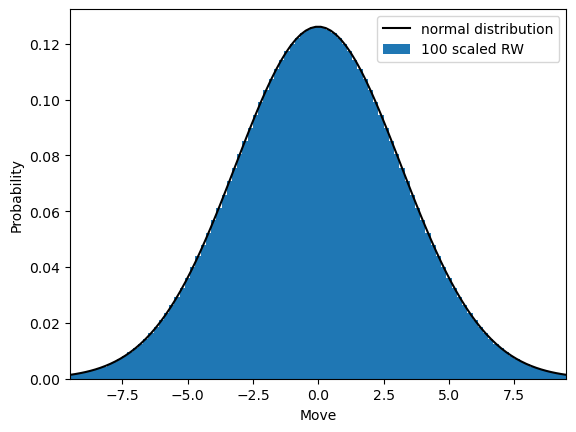

In [17]:
n = 100
t = 10 

# Combinations
def nCr(n, k): 
    f = math.factorial
    return f(n) / (f(k)*f(n-k))

# Permutations
perms = [nCr(n*t, k)*(0.5)**(n*t) for k in range(int(n*t)+1)]

W_nt = lambda n,t: 1/np.sqrt(n) * np.arange(-n*t, n*t+1, 2)

outcomes = W_nt(n, t)
plt.bar(outcomes, [perm/(outcomes[1]-outcomes[0]) for perm in perms], outcomes[1]-outcomes[0], label='{0} scaled RW'.format(n))

x = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), 100)
plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(t)), 'k-', label='normal distribution')

plt.xlim(-3*np.sqrt(t), 3*np.sqrt(t))
plt.ylabel("Probability")
plt.xlabel("Move")
plt.legend()
plt.show()

## Brownian Motion
$\lim_{n \to \infty}W^{(n)}(t) = \frac{1}{\sqrt{n}}M_m$

In [18]:
M = 10 # number of simulations
t = 10 # time
n = 100 
dt = t/n # time step

In [20]:
steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
origin = np.zeros((1, M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

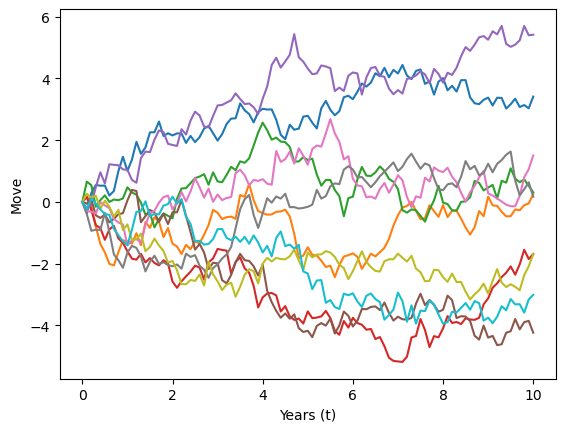

In [21]:
time = np.linspace(0, t, n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T

plt.plot(tt, bm_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [22]:
[quadratic_variation(path) for path in bm_paths.T[:10]]

[8.249, 9.325, 8.726, 8.287, 9.842, 9.64, 11.01, 9.39, 7.934, 9.596]

In [23]:
[variance(path) for path in bm_paths[1:11]]

[0.104, 0.145, 0.244, 0.431, 0.457, 0.646, 0.801, 0.95, 1.135, 1.065]